In [28]:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')

# view files in DeePore folder
%cd /content/drive/MyDrive/hb-final-project

import DeePore as dp
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.metrics import r2_score
from tensorflow.keras.layers import MaxPooling2D
from scipy.ndimage import distance_transform_edt as distance

# import updatedDP as udp
import deeporerevised as dpr
import os


dataset_1 = '/content/drive/MyDrive/Project/DeePore_Compact_Data.h5'
dataset_2 = '/content/drive/MyDrive/Project/DeePore_Compact_Data_2.h5'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hb-final-project


In [29]:
# REVISED DEEPORE
# Reason -> needs to also know how many slices being requested in each dir (1, 2 or 3)
# Revision -> directs to correct slice vol/ecl_distance function, changes shape of h5 slice written
def create_compact_dataset(Path_complete,Path_compact, n=1):
    S=dpr.hdf_shapes(Path_complete,['X'])
    for I in range(S[0][0]):
        X=dpr.readh5slice(Path_complete,'X',[I])
        Y=dpr.readh5slice(Path_complete,'Y',[I])
        if n == 1:
          X=dpr.slicevol_1(X)
        elif n == 2:
          X=dpr.slicevol_2(X)
        else:
          print("Functionality for that quantity of slices has not been implemented.")
        #X=ecl_distance(X, n)

        B=np.zeros((X.shape[0],128,128,3*n))
        for I in range(X.shape[0]):
            for J in range(X.shape[3]):

                t=distance(np.squeeze(X[I,:,:,J])) - distance(np.squeeze(1-X[I,:,:,J]))

                #t=np.float32(t)/64

                t[t<0] = 0  # Ensure non-negative values


                t = MaxPooling2D((2, 2)) (np.reshape(t,(1,256,256,1)))
                t=np.float64(t)
                t=t*13.5
                t = np.floor(t)
                B[I,:,:,J]=np.squeeze(t)


        dpr.writeh5slice(B.astype(np.uint8),Path_compact,'X',Shape=[128,128,3*n])
        dpr.writeh5slice(Y,Path_compact,'Y',Shape=[1515,1])


In [30]:
create_compact_dataset('/content/drive/MyDrive/Project/DeePore_Dataset.h5', '/content/drive/MyDrive/Project/new_compact_dataset_2.h5', n=2)



print("\n\n new 1")
# Open the HDF5 file in read mode
with h5py.File('/content/drive/MyDrive/Project/new_compact_dataset_2.h5', 'r') as f:
    # Print the keys (group names) at the root level of the HDF5 file
    print("Root keys:", list(f.keys()))

    # Access a specific group or dataset in the HDF5 file
    # For example, if 'X' is a dataset:
    dataset_X = f['X']
    # Print the shape and dtype of the dataset
    print("Shape of dataset X:", dataset_X.shape)
    print("Data type of dataset X:", dataset_X.dtype)

    first_entry = dataset_X[0][0]
    print("First entry in dataset X:\n", first_entry)


    # You can similarly explore other datasets, groups, and attributes within the HDF5 file
      # You can similarly explore other datasets, groups, and attributes within the HDF5 file
    dataset_Y = f['Y']
    # Print the shape and dtype of the dataset
    print("Shape of dataset Y:", dataset_Y.shape)
    print("Data type of dataset Y:", dataset_Y.dtype)

Streaming output truncated to the last 5000 lines.
writing slice 15268
writing slice 15269
writing slice 15269
writing slice 15270
writing slice 15270
writing slice 15271
writing slice 15271
writing slice 15272
writing slice 15272
writing slice 15273
writing slice 15273
writing slice 15274
writing slice 15274
writing slice 15275
writing slice 15275
writing slice 15276
writing slice 15276
writing slice 15277
writing slice 15277
writing slice 15278
writing slice 15278
writing slice 15279
writing slice 15279
writing slice 15280
writing slice 15280
writing slice 15281
writing slice 15281
writing slice 15282
writing slice 15282
writing slice 15283
writing slice 15283
writing slice 15284
writing slice 15284
writing slice 15285
writing slice 15285
writing slice 15286
writing slice 15286
writing slice 15287
writing slice 15287
writing slice 15288
writing slice 15288
writing slice 15289
writing slice 15289
writing slice 15290
writing slice 15290
writing slice 15291
writing slice 15291
writing s

In [ ]:
print("compact 2")
# Open the HDF5 file in read mode
with h5py.File(dataset_2, 'r') as f:
    # Print the keys (group names) at the root level of the HDF5 file
    print("Root keys:", list(f.keys()))

    # Access a specific group or dataset in the HDF5 file
    # For example, if 'X' is a dataset:
    dataset_X = f['X']
    # Print the shape and dtype of the dataset
    print("Shape of dataset X:", dataset_X.shape)
    print("Data type of dataset X:", dataset_X.dtype)

    first_entry = dataset_X[0]
    print("First entry in dataset X:", first_entry)


    # You can similarly explore other datasets, groups, and attributes within the HDF5 file
    dataset_Y = f['Y']
    # Print the shape and dtype of the dataset
    print("Shape of dataset Y:", dataset_Y.shape)
    print("Data type of dataset Y:", dataset_Y.dtype)


print("\n\n new 1")
# Open the HDF5 file in read mode
with h5py.File('/content/drive/MyDrive/Project/new_1.h5', 'r') as f:
    # Print the keys (group names) at the root level of the HDF5 file
    print("Root keys:", list(f.keys()))

    # Access a specific group or dataset in the HDF5 file
    # For example, if 'X' is a dataset:
    dataset_X = f['X']
    # Print the shape and dtype of the dataset
    print("Shape of dataset X:", dataset_X.shape)
    print("Data type of dataset X:", dataset_X.dtype)

    first_entry = dataset_X[0]
    print("First entry in dataset X:", first_entry)


    # You can similarly explore other datasets, groups, and attributes within the HDF5 file
      # You can similarly explore other datasets, groups, and attributes within the HDF5 file
    dataset_Y = f['Y']
    # Print the shape and dtype of the dataset
    print("Shape of dataset Y:", dataset_Y.shape)
    print("Data type of dataset Y:", dataset_Y.dtype)



print("\n\n full")
# X=dp.readh5slice('/content/drive/MyDrive/Project/DeePore_Dataset.h5','X',[0])

    # Open the HDF5 file in read mode
with h5py.File('/content/drive/MyDrive/Project/DeePore_Dataset.h5', 'r') as f:
    # Print the keys (group names) at the root level of the HDF5 file
    print("Root keys:", list(f.keys()))

    # Access a specific group or dataset in the HDF5 file
    # For example, if 'X' is a dataset:
    dataset_X = f['X']
    # Print the shape and dtype of the dataset
    print("Shape of dataset X:", dataset_X.shape)
    print("Data type of dataset X:", dataset_X.dtype)

    first_entry = dataset_X[0][0]
    print("First entry in dataset X:", first_entry)


    # You can similarly explore other datasets, groups, and attributes within the HDF5 file
      # You can similarly explore other datasets, groups, and attributes within the HDF5 file
    dataset_Y = f['Y']
    # Print the shape and dtype of the dataset
    print("Shape of dataset Y:", dataset_Y.shape)
    print("Data type of dataset Y:", dataset_Y.dtype)






print("\n\n compact1")
    # Open the HDF5 file in read mode
with h5py.File(dataset_1, 'r') as f:
    # Print the keys (group names) at the root level of the HDF5 file
    print("Root keys:", list(f.keys()))

    # Access a specific group or dataset in the HDF5 file
    # For example, if 'X' is a dataset:
    dataset_X = f['X']
    # Print the shape and dtype of the dataset
    print("Shape of dataset X:", dataset_X.shape)
    print("Data type of dataset X:", dataset_X.dtype)

    first_entry = dataset_X[0][0]
    print("First entry in dataset X:", first_entry)


    # You can similarly explore other datasets, groups, and attributes within the HDF5 file
      # You can similarly explore other datasets, groups, and attributes within the HDF5 file
    dataset_Y = f['Y']
    # Print the shape and dtype of the dataset
    print("Shape of dataset Y:", dataset_Y.shape)
    print("Data type of dataset Y:", dataset_Y.dtype)




compact 2
Root keys: ['X', 'Y']
Shape of dataset X: (17700, 128, 128, 6)
Data type of dataset X: float64
First entry in dataset X: [[[-0.04419417  0.03125    -0.03125     0.015625   -0.24256523
   -0.078125  ]
  [-0.03125    -0.015625    0.015625    0.015625   -0.23644915
   -0.078125  ]
  [-0.03125    -0.046875    0.015625   -0.03125    -0.234375
   -0.06987713]
  ...
  [-0.14405538 -0.125      -0.15625    -0.1875     -0.09882118
   -0.03125   ]
  [-0.140625   -0.15625    -0.1875     -0.21875    -0.11267348
    0.015625  ]
  [-0.1414904  -0.1875     -0.21875    -0.23489526 -0.13258252
    0.046875  ]]

 [[-0.03125     0.03125    -0.03125     0.015625   -0.21252298
   -0.046875  ]
  [ 0.015625   -0.015625    0.015625    0.015625   -0.20551479
   -0.046875  ]
  [ 0.015625   -0.046875    0.03493856 -0.03125    -0.203125
   -0.046875  ]
  ...
  [-0.11375172 -0.12597278 -0.1570293  -0.19008633 -0.06987713
   -0.03125   ]
  [-0.109375   -0.1570293  -0.18814991 -0.203125   -0.08838835
    0.

In [ ]:
##### DEEPORE ORIGINAL
# Load the .mat file containing true and predicted values
data = sio.loadmat('Tested_Data_Model3_S2_P1515.mat')

# Extract true and predicted values
y_true = data['y']
y_pred = data['y2']


# Initialize a dictionary to store R-squared values for each property
r_squared_values = {}

# Iterate over each property
for i in range(y_true.shape[1]):  # Assuming y_true and y_pred have the same number of properties
    # Calculate R-squared value for the current property
    r_squared_values[i] = r2_score(y_true[:, i], y_pred[:, i])

for i in range(15):
  print("value : "+ str(r_squared_values[i]))

print("R-squared values for each property:", r_squared_values)

# # Plotting
# plt.figure(figsize=(20, 10))

# # Iterate over the first 15 properties
# for i in range(15):
#     plt.subplot(3, 5, i+1)
#     plt.scatter(y_true[:, i], y_pred[:, i])
#     plt.plot([y_true[:, i].min(), y_true[:, i].max()], [y_true[:, i].min(), y_true[:, i].max()], 'k--', lw=2)
#     plt.xlabel('Actual')
#     plt.ylabel('Predicted')
#     plt.title(f'Actual vs Predicted for Property {i+1}')
#     plt.axis('equal')

# plt.tight_layout()
# plt.show()

value : -0.4394867796881341
value : -0.18951632270989238
value : -0.5958455924188881
value : -0.34870625306980885
value : -0.5648589447759336
value : -0.8628484226994526
value : -0.9126067539546312
value : -0.3852011912354403
value : -0.663609467566018
value : -0.02309777006844116
value : -0.21148653336686896
value : -0.2479361150630246
value : -0.0058073772310058835
value : -0.09347095229838054
value : -0.15452957633129194
R-squared values for each property: {0: -0.4394867796881341, 1: -0.18951632270989238, 2: -0.5958455924188881, 3: -0.34870625306980885, 4: -0.5648589447759336, 5: -0.8628484226994526, 6: -0.9126067539546312, 7: -0.3852011912354403, 8: -0.663609467566018, 9: -0.02309777006844116, 10: -0.21148653336686896, 11: -0.2479361150630246, 12: -0.0058073772310058835, 13: -0.09347095229838054, 14: -0.15452957633129194, 15: -0.28427084063609476, 16: -0.2984437322336504, 17: -0.2932103885690216, 18: -0.27401644567012395, 19: -0.2592129585820582, 20: -0.2511149942019868, 21: -0.241

Checking the data for outliers. Please wait...
checking sample: 0
checking sample: 100
checking sample: 200
checking sample: 300
checking sample: 400
checking sample: 500
checking sample: 600
checking sample: 700
checking sample: 800
checking sample: 900
checking sample: 1000
checking sample: 1100
checking sample: 1200
checking sample: 1300
checking sample: 1400
checking sample: 1500
checking sample: 1600
checking sample: 1700
checking sample: 1800
checking sample: 1900
checking sample: 2000
checking sample: 2100
checking sample: 2200
checking sample: 2300
checking sample: 2400
checking sample: 2500
checking sample: 2600
checking sample: 2700
checking sample: 2800
checking sample: 2900
checking sample: 3000
checking sample: 3100
checking sample: 3200
checking sample: 3300
checking sample: 3400
checking sample: 3500
checking sample: 3600
checking sample: 3700
checking sample: 3800
checking sample: 3900
checking sample: 4000
checking sample: 4100
checking sample: 4200
checking sample: 43

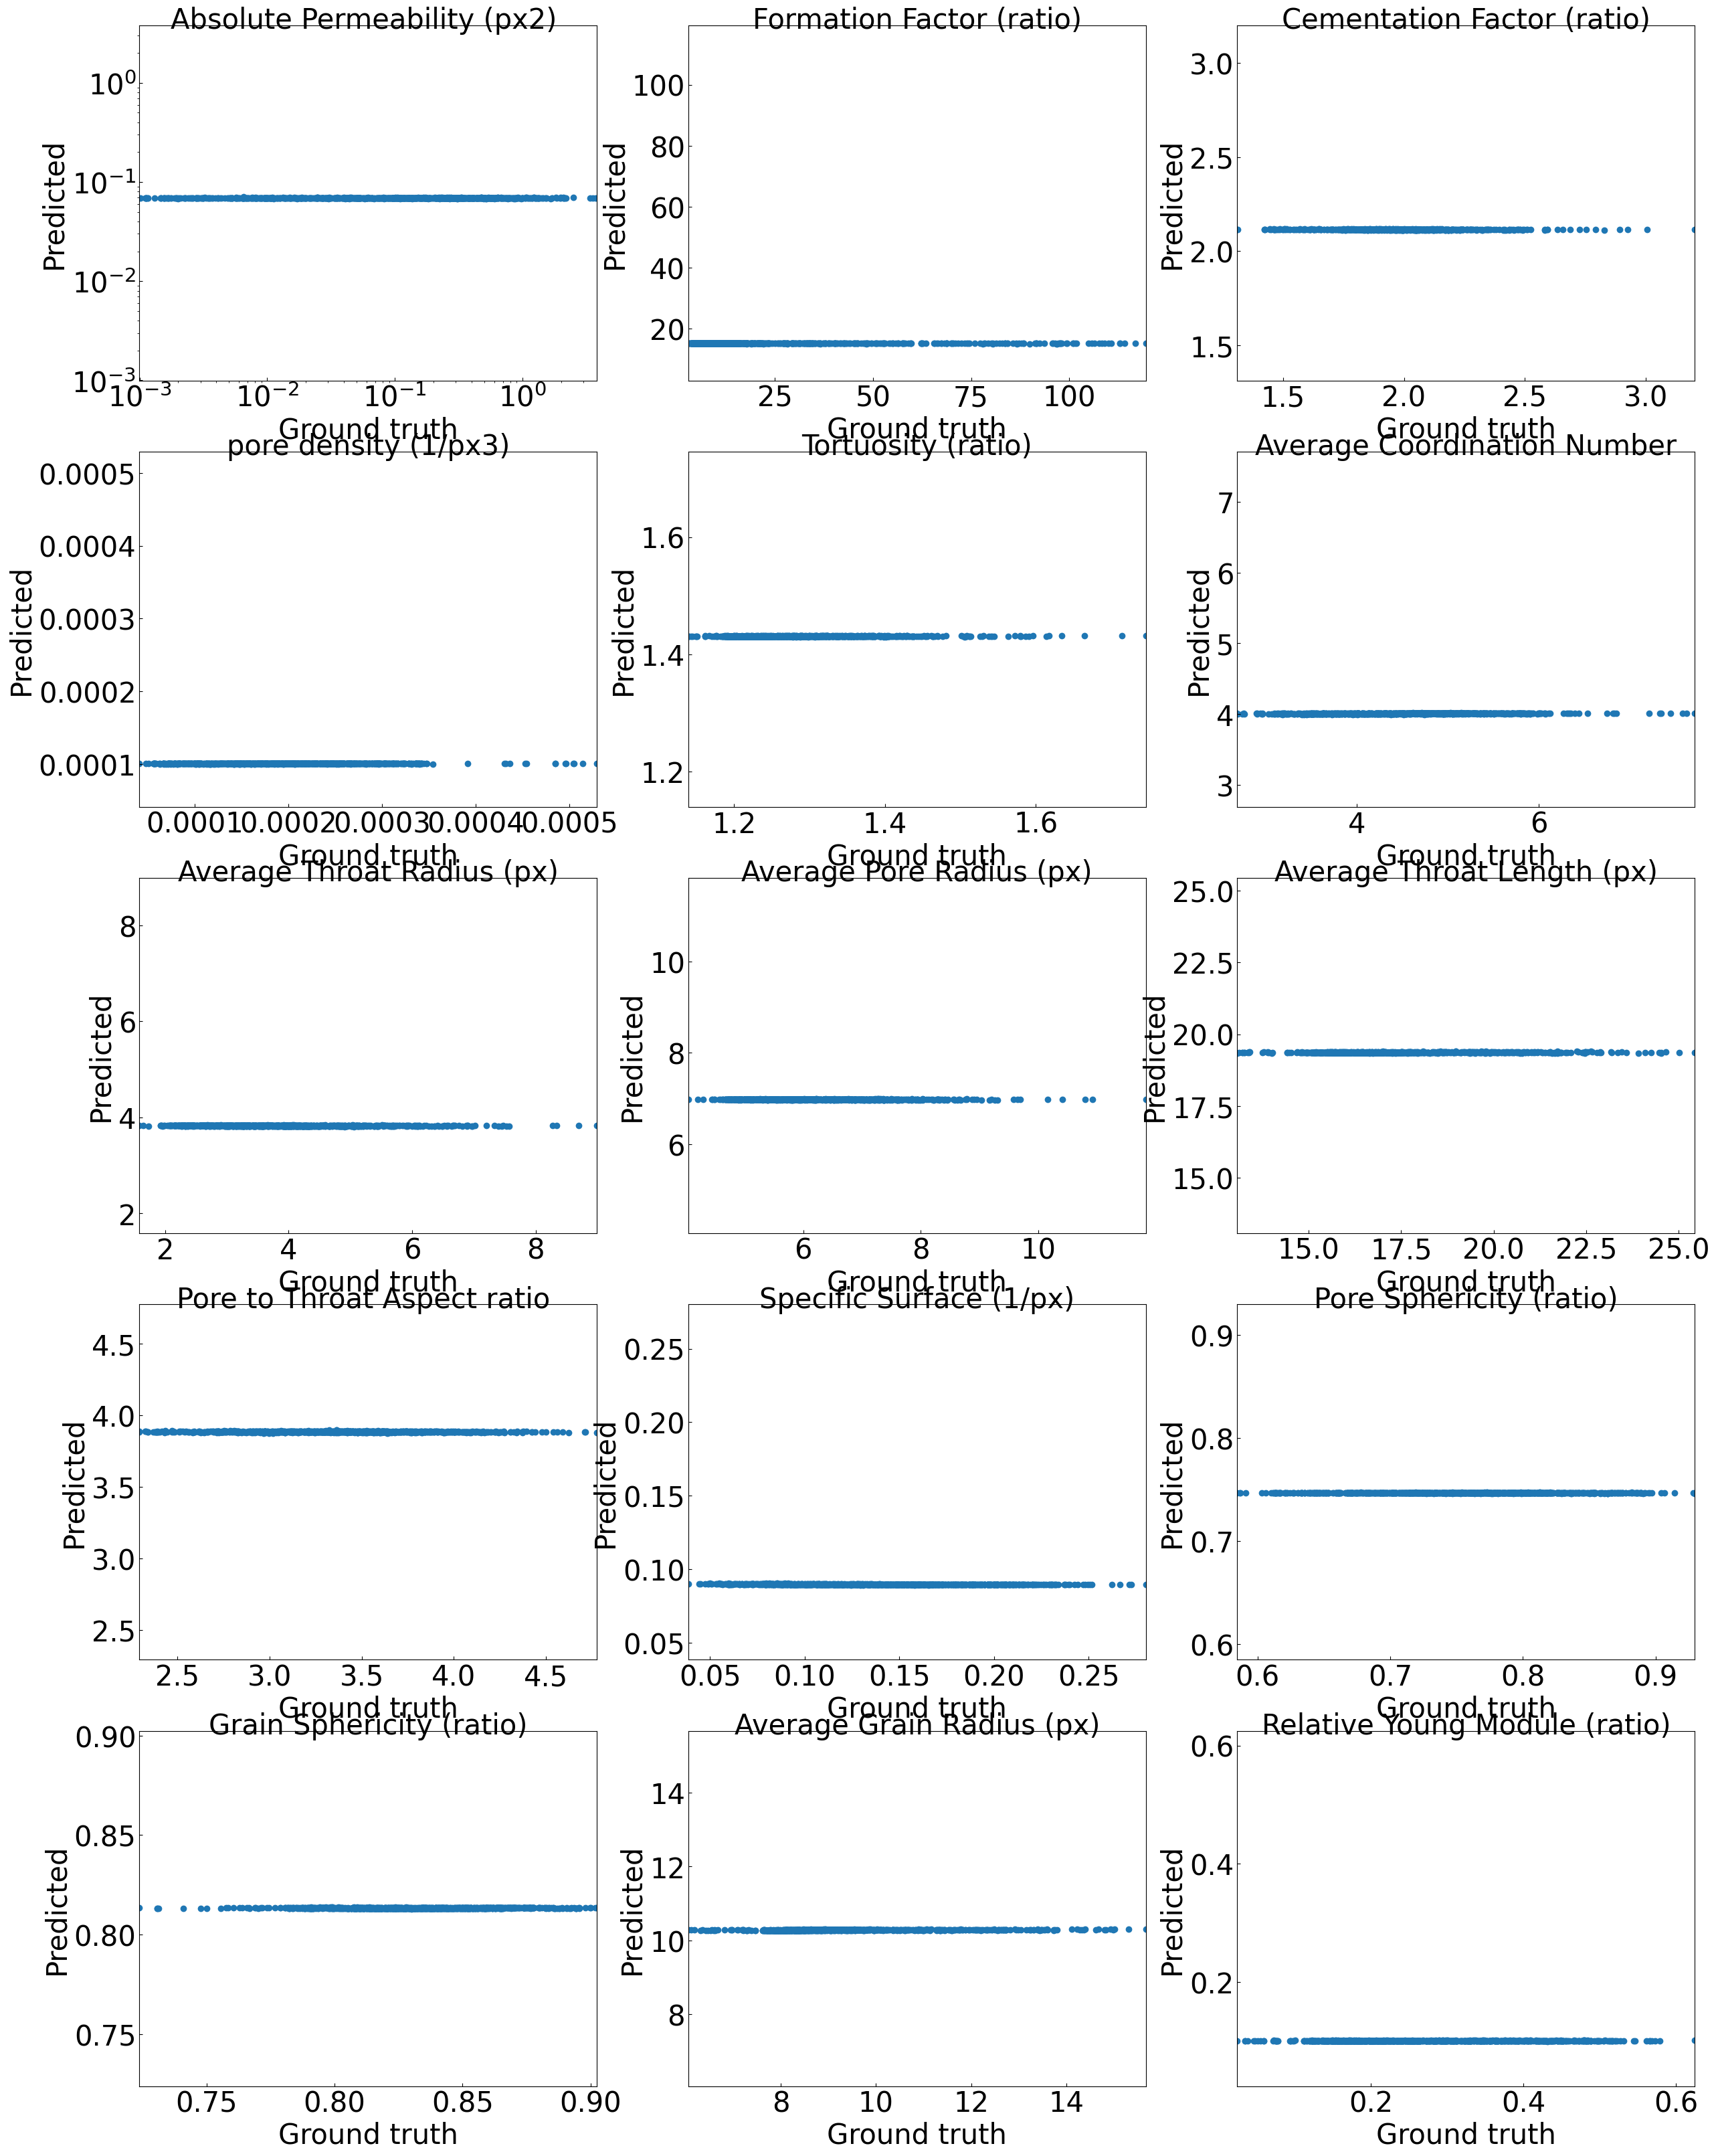

In [ ]:
dataset_1 = '/content/drive/MyDrive/Project/DeePore_Compact_Data.h5'
dataset_2 = '/content/drive/MyDrive/Project/DeePore_Compact_Data_2.h5'

List=dpr.prep(dataset_2)

TestList=List[1:1000]     #uncomment for a smaller dataset for test purposes
#TrainList, EvalList, TestList = dp.splitdata(List)

model=dpr.loadmodel(ModelType=2, n=2)

dpr.testmodel(model,dataset_2, TestList, ModelType=2,n=2)